In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import xgboost as xgb  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reading data

In [8]:
combined_data_path = '../EDA_kaggle/combined_data.csv'
combined_data = pd.read_csv(combined_data_path)

# View the first few rows to ensure the data is loaded successfully
print(combined_data.head())

   Age  BusinessTravel  DistanceFromHome  Education  EmployeeNumber  \
0   37               1                 1          4              77   
1   54               2                 1          4            1245   
2   34               2                 7          3             147   
3   39               1                 1          1            1026   
4   28               2                 1          3            1111   

   EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  JobSatisfaction  \
0                        1       0               2         2                3   
1                        4       1               3         3                3   
2                        1       0               1         2                3   
3                        4       1               2         4                4   
4                        1       0               2         1                2   

   ...  JobRole_Human Resources  JobRole_Laboratory Technician  \
0  ...              

In [9]:
combined_data.columns

Index(['Age', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Label', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_

# Fitting the model

In [16]:
X = combined_data.drop(columns=['Label'])
y = combined_data['Label']

In [17]:
# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
# Prepare the data
dtrain = xgb.DMatrix(X_train, label=y_train)  
dtest = xgb.DMatrix(X_test, label=y_test)  

# Set XGBoost parameters for binary classification
params = {  
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',        # Logarithmic loss for binary classification
    'max_depth': 4,                  # Tree depth (can be tuned)
    'eta': 0.3,                      # Learning rate (can be tuned)
    'seed': 42                       # Seed for reproducibility
}  

# Train the model  
num_round = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round)  

# Predict on the test set
y_pred = bst.predict(dtest)   
best_preds = [1 if y > 0.5 else 0 for y in y_pred]  # Binary classification threshold at 0.5

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, best_preds) 
precision = precision_score(y_test, best_preds)
recall = recall_score(y_test, best_preds)
f1 = f1_score(y_test, best_preds)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.96
Precision: 0.9333
Recall: 0.8333
F1 Score: 0.8805


#  Select Features

#### Visualize feature importance

C:\Users\user\AppData\Local\Temp\ipykernel_49376\483236249.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[imp[1] for imp in importance_list], y=[imp[0] for imp in importance_list], palette="viridis")


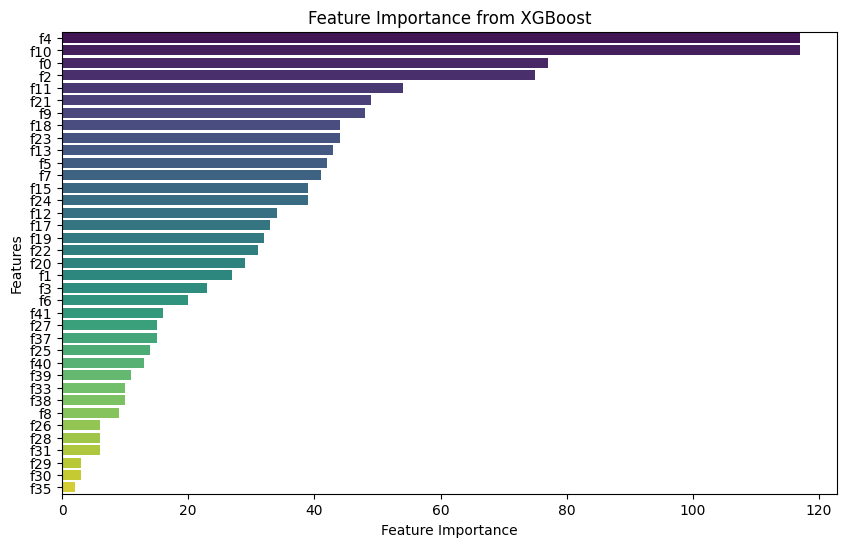

In [20]:
importance = bst.get_score(importance_type='weight')  
  
importance_list = sorted(importance.items(), key=lambda x: x[1], reverse=True)  
  
plt.figure(figsize=(10, 6))  
sns.barplot(x=[imp[1] for imp in importance_list], y=[imp[0] for imp in importance_list], palette="viridis")  
plt.xlabel('Feature Importance')  
plt.ylabel('Features')  
plt.title('Feature Importance from XGBoost')  
plt.show()

#### So select top 22 features based on importance

In [26]:
importance = bst.get_score(importance_type='weight')  
  
importance_with_names = {feature: score for feature, score in zip(X.columns, importance.values())}  
  
# Sort feature importance and extract the top 22 most significant features  
sorted_importance = sorted(importance_with_names.items(), key=lambda item: item[1], reverse=True)  
top_22_features = sorted_importance[:22]  
top_22_feature_names = [feature for feature, score in top_22_features]   

# Print the top 22 significant features  
print("Top 22 features by importance:")  
for feature, score in top_22_features:  
    print(f"{feature}: {score:.4f}")

# Select these significant features from X
X_selected = X[top_22_feature_names]

Top 22 features by importance:
MonthlyIncome: 130.0000
EmployeeNumber: 116.0000
Age: 94.0000
DistanceFromHome: 81.0000
PercentSalaryHike: 51.0000
JobSatisfaction: 48.0000
NumCompaniesWorked: 48.0000
JobInvolvement: 46.0000
TrainingTimesLastYear: 45.0000
YearsInCurrentRole: 44.0000
EnvironmentSatisfaction: 41.0000
StandardHours: 40.0000
WorkLifeBalance: 40.0000
YearsAtCompany: 40.0000
StockOptionLevel: 39.0000
RelationshipSatisfaction: 38.0000
OverTime: 37.0000
PerformanceRating: 34.0000
TotalWorkingYears: 33.0000
BusinessTravel: 27.0000
Education: 20.0000
JobRole_Laboratory Technician: 18.0000


In [28]:
# Standardize the selected features
scaler = StandardScaler()
X_selected_standardized = scaler.fit_transform(X_selected)  # Standardize features to mean 0 and variance 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_standardized, y, test_size=0.2, random_state=42)

# Convert data into DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)  
dtest = xgb.DMatrix(X_test, label=y_test)  

# Set XGBoost parameters (since it's a binary classification problem)
params = {  
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',        # Logarithmic loss
    'max_depth': 4,                  # Tree depth
    'eta': 0.3,                      # Learning rate
    'seed': 42                       # Random seed for reproducibility
}

# Train the model  
num_round = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round)

# Predict on the test set
y_pred = bst.predict(dtest)
best_preds = [1 if y > 0.5 else 0 for y in y_pred]  # Convert probabilities to binary 0/1 predictions

# Calculate metrics
accuracy = accuracy_score(y_test, best_preds)
precision = precision_score(y_test, best_preds)
recall = recall_score(y_test, best_preds)
f1 = f1_score(y_test, best_preds)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.97
Precision: 0.9359
Recall: 0.8690
F1 Score: 0.9012


## Addressing data imbalance

In [29]:
# Perform oversampling using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_selected_standardized, y)

# Split the oversampled dataset into training and testing sets
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Prepare the data for XGBoost
dtrain = xgb.DMatrix(X_train_res, label=y_train_res)
dtest = xgb.DMatrix(X_test_res, label=y_test_res)

# Set XGBoost parameters for binary classification
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 4,
    'eta': 0.3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Predict on the test set
y_pred = bst.predict(dtest)
best_preds = [1 if y > 0.5 else 0 for y in y_pred]

# Calculate metrics
accuracy = accuracy_score(y_test_res, best_preds)
precision = precision_score(y_test_res, best_preds, average='binary')
recall = recall_score(y_test_res, best_preds, average='binary')
f1 = f1_score(y_test_res, best_preds, average='binary')

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.97
Precision: 0.9775
Recall: 0.9654
F1 Score: 0.9714


In [30]:
# Standardize the selected features
scaler = StandardScaler()
X_selected_standardized = scaler.fit_transform(X_selected)  # Standardize features to mean 0 and variance 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_standardized, y, test_size=0.2, random_state=42)

# Convert data into DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)  
dtest = xgb.DMatrix(X_test, label=y_test)  

# Set XGBoost parameters (since it's a binary classification problem)
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 4,
    'eta': 0.3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'scale_pos_weight': len(y[y == 0]) / len(y[y == 1])  
}


# Train the model  
num_round = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round)

# Predict on the test set
y_pred = bst.predict(dtest)
best_preds = [1 if y > 0.5 else 0 for y in y_pred]  # Convert probabilities to binary 0/1 predictions

# Calculate metrics
accuracy = accuracy_score(y_test, best_preds)
precision = precision_score(y_test, best_preds)
recall = recall_score(y_test, best_preds)
f1 = f1_score(y_test, best_preds)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.96
Precision: 0.8706
Recall: 0.8810
F1 Score: 0.8757
